In [4]:
import pandas as pd

# Load the CSV file to inspect the data
file_path = "C:\\Users\\prasanna\\OneDrive\\Documents\\Task 3_Final Content Data set.csv"
df = pd.read_csv(file_path)

# Display the first few rows and the summary of the dataset to understand its structure
df.head(10)


,Unnamed: 0,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,07-11-2020 09:43,photo,studying,negative,0
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17-06-2021 12:22,photo,studying,negative,10
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18-04-2021 05:13,photo,studying,negative,15
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,06-01-2021 19:13,photo,studying,negative,0
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,23-08-2020 12:25,photo,studying,positive,30
5,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,peeking,07-12-2020 06:27,photo,studying,neutral,35
6,6,97522e57-d9ab-4bd6-97bf-c24d952602d2,cherish,11-04-2021 17:35,photo,studying,positive,70
7,7,97522e57-d9ab-4bd6-97bf-c24d952602d2,hate,27-01-2021 08:32,photo,studying,negative,5
8,8,97522e57-d9ab-4bd6-97bf-c24d952602d2,peeking,01-04-2021 22:54,photo,studying,neutral,35
9,9,97522e57-d9ab-4bd6-97bf-c24d952602d2,love,04-08-2020 05:05,photo,studying,positive,65


In [5]:
df.describe()

,Unnamed: 0,Score
count,24573.000000,24573.000000
mean,12286.000000,39.622553
std,7093.758418,26.043011
min,0.000000,0.000000
25%,6143.000000,15.000000
50%,12286.000000,35.000000
75%,18429.000000,65.000000
max,24572.000000,75.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     24573 non-null  int64 
 1   Content ID     24573 non-null  object
 2   Reaction Type  24573 non-null  object
 3   Datetime       24573 non-null  object
 4   Content Type   24573 non-null  object
 5   Category       24573 non-null  object
 6   Sentiment      24573 non-null  object
 7   Score          24573 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 1.5+ MB


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


# Trying with a different date format
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M', errors='coerce')

# Check if there are any NaT values (which indicates parsing errors)
missing_dates = df['Datetime'].isna().sum()

missing_dates


# Aggregate scores by category
category_scores = df.groupby('Category')['Score'].sum().sort_values(ascending=False)

# Get the top 5 performing categories
top_5_categories = category_scores.head(5)

# Number of unique categories
unique_categories = df['Category'].nunique()

# Most popular category
most_popular_category = category_scores.idxmax()
reactions_most_popular = df[df['Category'] == most_popular_category].shape[0]

# Month with the most posts
df['Month'] = df['Datetime'].dt.month
month_with_most_posts = df['Month'].value_counts().idxmax()



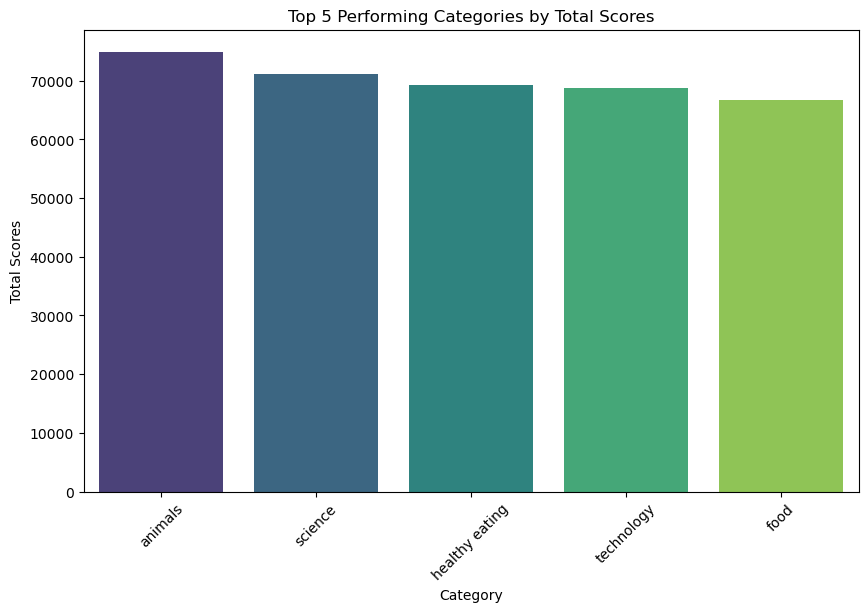

In [10]:

# Plotting the top 5 categories in a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_categories.index, y=top_5_categories.values, palette='viridis')
plt.title('Top 5 Performing Categories by Total Scores')
plt.xlabel('Category')
plt.ylabel('Total Scores')
plt.xticks(rotation=45)
plt.show()


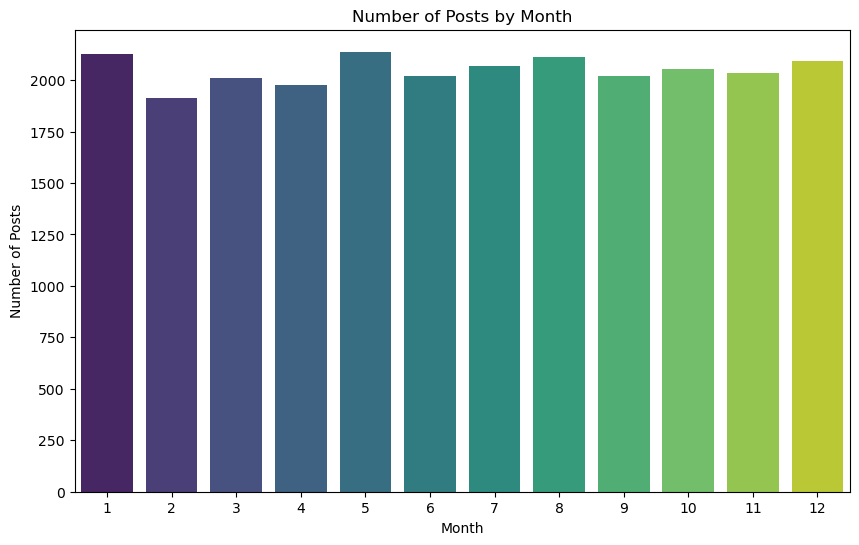

In [11]:
# Plotting the distribution of posts by month in a bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Month'], palette='viridis')
plt.title('Number of Posts by Month')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.show()


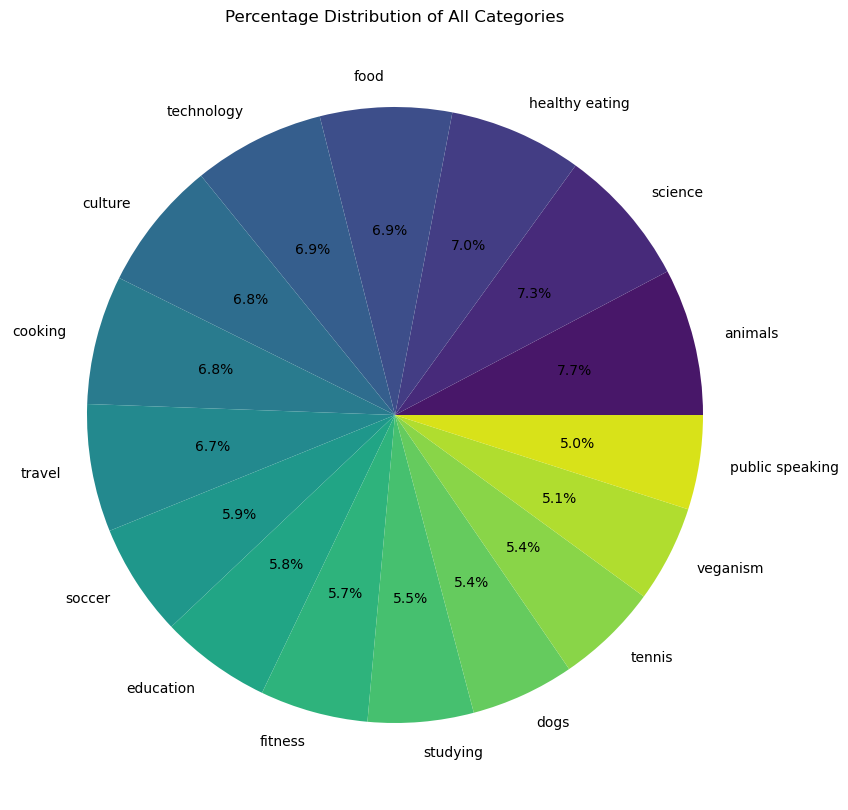

In [13]:
# Calculate the percentage distribution of all categories
category_distribution = df['Category'].value_counts(normalize=True) * 100

# Plotting the percentage distribution of all categories in a pie chart
plt.figure(figsize=(10, 10))
plt.pie(category_distribution, labels=category_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(category_distribution)))
plt.title('Percentage Distribution of All Categories')
plt.show()


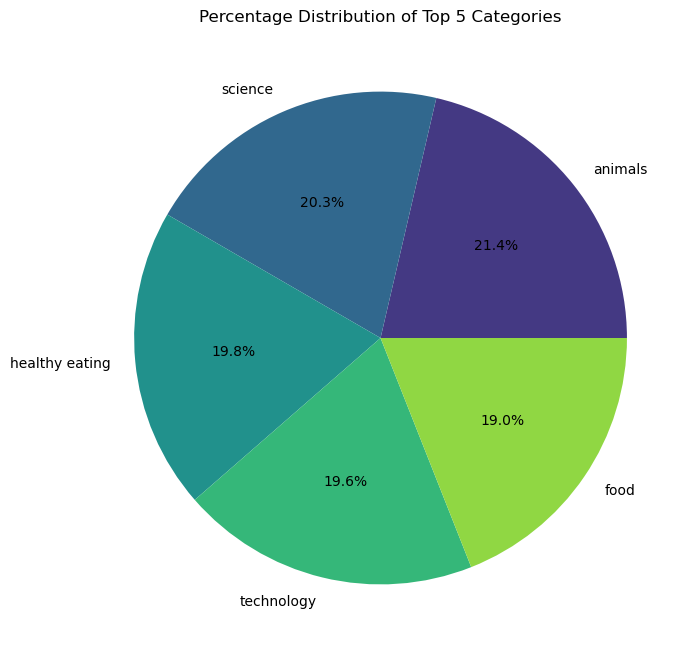

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already calculated the top 5 categories
top_5_categories = category_scores.head(5)

# Calculate the percentage distribution of the top 5 categories
top_5_percentage = top_5_categories / top_5_categories.sum() * 100

# Plotting the percentage distribution of the top 5 categories in a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_percentage, labels=top_5_percentage.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(top_5_percentage)))
plt.title('Percentage Distribution of Top 5 Categories')
plt.show()
